In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data
historic_data = pd.read_csv("historic.csv")
prediction_data = pd.read_csv("prediction_input.csv")

# Handle missing values (replace with appropriate strategy, e.g., imputation or removal)
historic_data.fillna(method="ffill", inplace=True)  # Replace with more suitable method if needed

# Encode categorical features using one-hot encoding
ohe = OneHotEncoder(sparse=False)
encoded_category = ohe.fit_transform(historic_data[["category"]])
encoded_promotion = ohe.fit_transform(historic_data[["main_promotion"]])

# Standardize numerical features
scaler = StandardScaler()
scaled_stars = scaler.fit_transform(historic_data[["stars"]])

# Create feature matrix and target vector
X = pd.concat([pd.DataFrame(encoded_category), pd.DataFrame(encoded_promotion), pd.DataFrame(scaled_stars)], axis=1)
y = historic_data["success_indicator"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
# Create the model
model = LogisticRegression(solver="liblinear", random_state=42)  # Adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)


LogisticRegression(random_state=42, solver='liblinear')

Accuracy: 0.8106
Precision: 0.8270
Recall: 0.8921
F1-score: 0.8583
AUC: 0.8395


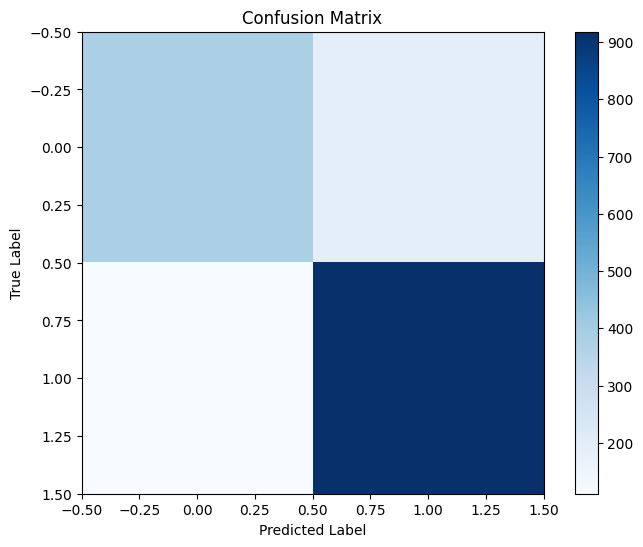

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='top')  # Specify 'top' as the positive label
recall = recall_score(y_test, y_pred, pos_label='top')  # Specify 'top' as the positive label
f1 = f1_score(y_test, y_pred, pos_label='top')  # Specify 'top' as the positive label
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Use probability for AUC

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Consider plotting confusion matrix and ROC curve for further insights
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [12]:
historic_data.head(10)

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top
5,200284,Hoodie,Display_Ad_Campaign,Yellow,3.9,flop
6,974264,Sweatshirt,Catalog,Red,1.4,flop
7,389059,Sweatshirt,Category_Highlight,Red,1.8,top
8,413025,T-Shirt,Catalog,Black,3.2,top
9,615692,Hoodie,Category_Highlight,White,5.0,top


<Axes: xlabel='success_indicator', ylabel='stars'>

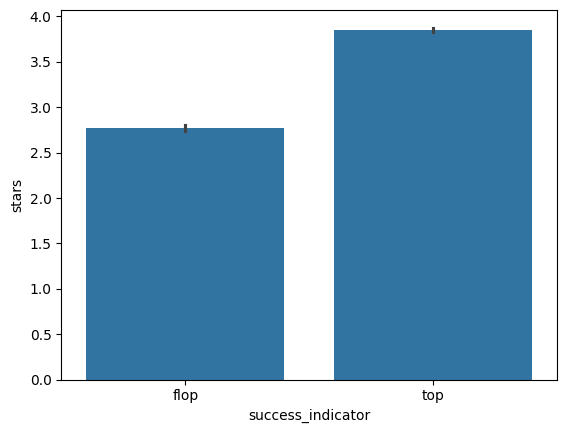

In [17]:
# prompt: create a chart for analyzing success_indicator

sns.barplot(x = 'success_indicator', y = 'stars', data = historic_data)


In [18]:
prediction_data.head(10)

,item_no,category,main_promotion,color,stars
0,405901,Sweatshirt,Catalog,Blue,3.1
1,644275,Polo-Shirt,Frontpage_Header,Yellow,2.6
2,533070,Tunic,Catalog,Green,2.7
3,829436,Polo-Shirt,Catalog,Yellow,2.6
4,801722,Tunic,Catalog,Yellow,4.9
5,866263,T-Shirt,Category_Highlight,Black,2.6
6,502221,Sweatshirt,Catalog,Red,1.6
7,545865,Tunic,Category_Highlight,Green,3.5
8,440112,Sweatshirt,Display_Ad_Campaign,Blue,3.7
9,930925,Tunic,Catalog,Green,2.0


<Axes: title={'center': 'stars'}, xlabel='success_indicator'>

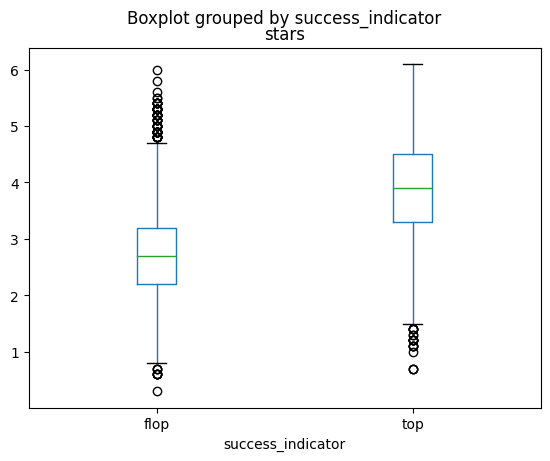

In [20]:
historic_data.boxplot(by ='success_indicator', column =['stars'], grid = False)

In [21]:
merged_df = pd.merge(historic_data, prediction_data, on='stars',how='inner', suffixes=('_left', '_right'))

In [22]:
merged_df.head(5)

,item_no_left,category_left,main_promotion_left,color_left,stars,success_indicator,item_no_right,category_right,main_promotion_right,color_right
0,739157,Tunic,Catalog,Green,3.1,flop,405901,Sweatshirt,Catalog,Blue
1,739157,Tunic,Catalog,Green,3.1,flop,587038,Tunic,Frontpage_Header,Yellow
2,739157,Tunic,Catalog,Green,3.1,flop,458062,Tunic,Category_Highlight,Multi-Color
3,739157,Tunic,Catalog,Green,3.1,flop,299479,Polo-Shirt,Catalog,Green
4,739157,Tunic,Catalog,Green,3.1,flop,230030,Hoodie,Catalog,Yellow


# **From below countplot we can understand , that in historic data , polo shirt were more flop and Tshirt were at Top.**

<Axes: xlabel='category', ylabel='count'>

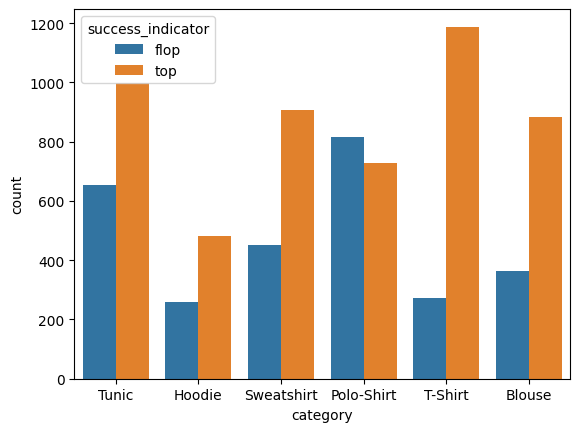

In [23]:
sns.countplot(x ='category', hue = "success_indicator", data = historic_data)

In [24]:
# Assuming 'df' is your DataFrame containing the dataset
filtered_data = historic_data[(historic_data['category'] == 'tunic') & (historic_data['success_indicator'] == 'flop')]

# Display the filtered data
print(filtered_data)


Empty DataFrame
Columns: [item_no, category, main_promotion, color, stars, success_indicator]
Index: []


In [31]:
historic_data.head(1000)

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top
...,...,...,...,...,...,...
995,769490,Hoodie,Category_Highlight,Green,3.4,flop
996,745364,Blouse,Display_Ad_Campaign,Brown,5.1,top
997,312875,Hoodie,Catalog,Yellow,3.3,top
998,116862,Hoodie,Catalog,Orange,3.1,top


In [33]:
# prompt: give me total count where category is Tunic and success_indicator is flop

tunic_flop_count = historic_data[(historic_data['category'] == 'Tunic') & (historic_data['success_indicator'] == 'flop')].shape[0]
print(f"Total count where category is Tunic and success_indicator is flop: {tunic_flop_count}")


Total count where category is Tunic and success_indicator is flop: 653


<Axes: xlabel='stars', ylabel='category'>

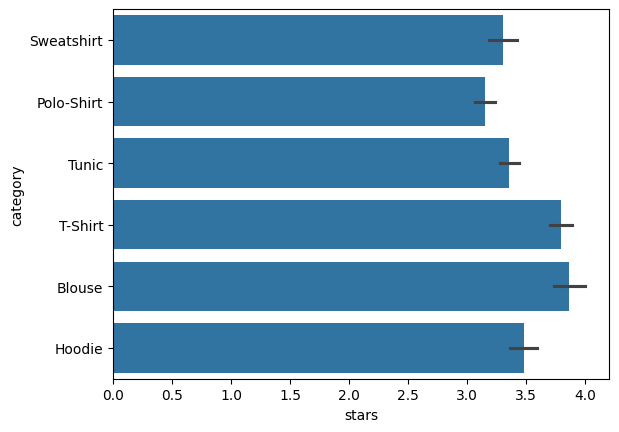

# **Above mentioned is a predictive dataset , by our other assumptions we can see that category of products above rating 3 will be on top and category with  stars above 3.5 will be sure at top**

<Axes: xlabel='stars', ylabel='success_indicator'>

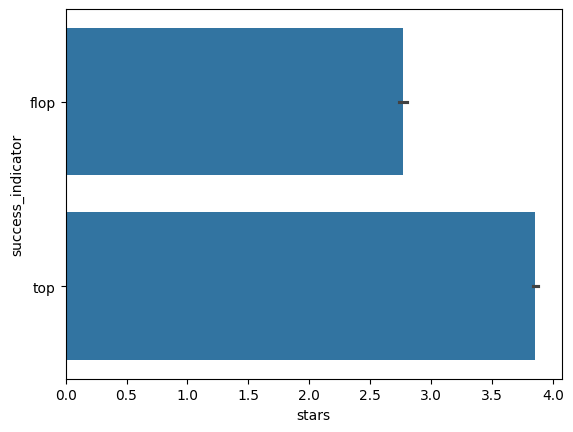

In [36]:
# prompt: plot and compare stars and success_indicator from historic dataset

sns.barplot(x = 'stars', y = 'success_indicator', data = historic_data)


### **It was obeserved that the category of products less than 3.0 rating stars are most probably to get flop.**

In [37]:
historic_data.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


<Axes: xlabel='color'>

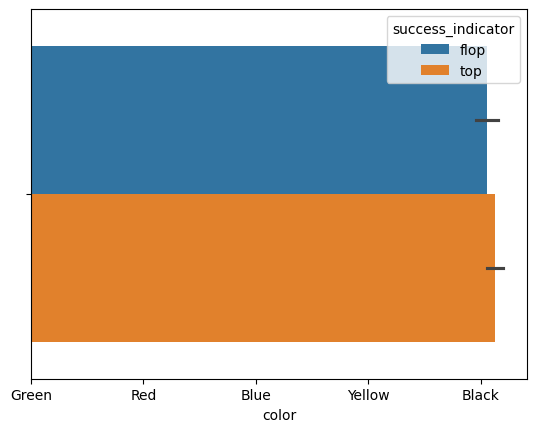

In [43]:
# prompt: stacked  bar chart to compare color and success_indicator with for every colour it will show flop and top quantity

sns.barplot(x = 'color', hue = 'success_indicator', data = historic_data)


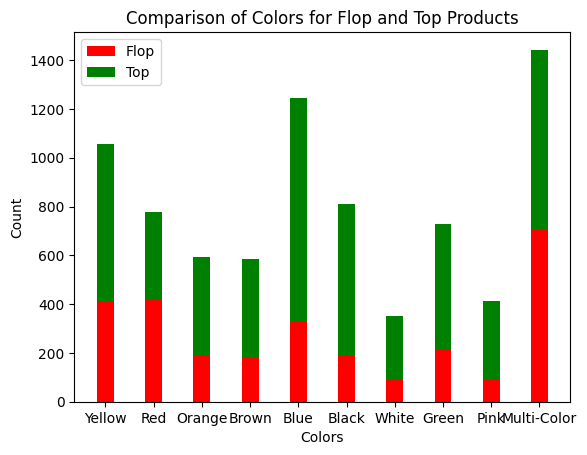

In [45]:
import matplotlib.pyplot as plt

# Sample data
colors = historic_data["color"]
flop_counts = historic_data[historic_data["success_indicator"] == "flop"]["color"].value_counts()
top_counts = historic_data[historic_data["success_indicator"] == "top"]["color"].value_counts()

# If there are missing colors in either "flop" or "top" products, we need to align the indices
# This ensures that both flop_counts and top_counts have the same indices, even if some colors are missing in one
all_colors = set(flop_counts.index) | set(top_counts.index)
flop_counts = flop_counts.reindex(all_colors, fill_value=0)
top_counts = top_counts.reindex(all_colors, fill_value=0)

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
x = range(len(all_colors))

# Create the stacked bar chart
plt.bar(x, flop_counts, width=bar_width, label='Flop', color='red')
plt.bar(x, top_counts, width=bar_width, bottom=flop_counts, label='Top', color='green')

# Add labels, title, and legend
plt.xlabel('Colors')
plt.ylabel('Count')
plt.title('Comparison of Colors for Flop and Top Products')
plt.xticks(x, all_colors)
plt.legend()

# Show the chart
plt.show()


### **comparing colors with success-indicator we understand which color products have been flop and which color products have been on top **

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [48]:
numeric_features = ['stars']
categorical_features = ['category', 'main_promotion', 'color']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

X = historic_data.drop('success_indicator', axis=1)
y = historic_data['success_indicator']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

Accuracy: 0.81875
              precision    recall  f1-score   support

        flop       0.78      0.69      0.73       571
         top       0.84      0.89      0.86      1029

    accuracy                           0.82      1600
   macro avg       0.81      0.79      0.80      1600
weighted avg       0.82      0.82      0.82      1600



In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


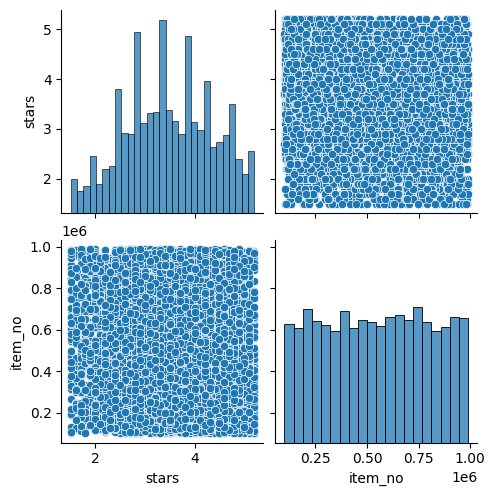

In [51]:
df = historic_data.copy()
if 'success_indicator' in df.columns:
    from sklearn.ensemble import IsolationForest
    outlier_detector = IsolationForest(contamination=0.05)
    outlier_mask = outlier_detector.fit_predict(df[['stars']])
    df = df[outlier_mask == 1]

    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = ['category', 'main_promotion', 'color']
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    X = df.drop('success_indicator', axis=1)
    y = df['success_indicator']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    sns.pairplot(df[['stars', 'item_no']])
    plt.show()
else:
    print("'success_indicator' column not found in the dataframe.")

In [52]:
if 'success_indicator' in df.columns:

    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_processed, y_train)

    y_pred = clf.predict(X_test_processed)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    print(classification_report(y_test, y_pred))
else:
    print("'success_indicator' column not found in the dataframe.")


Accuracy: 0.8065573770491803
              precision    recall  f1-score   support

        flop       0.76      0.68      0.72       552
         top       0.83      0.88      0.85       973

    accuracy                           0.81      1525
   macro avg       0.79      0.78      0.79      1525
weighted avg       0.80      0.81      0.80      1525



In [54]:
df = historic_data[['category', 'color', 'stars','success_indicator']]

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
categorical_cols = ['category', 'color']

In [57]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [58]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, ['item_no', 'stars'])
    ])

In [59]:
clf = RandomForestClassifier()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', clf)])

In [62]:
X = df.drop('success_indicator', axis=1)
y = df['success_indicator']


In [63]:
df

,category,color,stars,success_indicator
0,Tunic,Green,3.1,flop
1,Hoodie,Red,1.5,flop
2,Sweatshirt,Red,4.4,top
3,Polo-Shirt,Blue,3.1,flop
4,Hoodie,Green,4.1,top
...,...,...,...,...
7995,T-Shirt,Blue,3.9,flop
7996,Sweatshirt,Green,3.5,top
7997,T-Shirt,Yellow,4.0,flop
7998,Blouse,Blue,2.6,flop


In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def label_encode_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df

his_encoded = label_encode_columns(df)

<ipython-input-65-946553e4a3b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-65-946553e4a3b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-65-946553e4a3b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [66]:
his_encoded

,category,color,stars,success_indicator
0,5,3,3.1,0
1,1,7,1.5,0
2,3,7,4.4,1
3,2,1,3.1,0
4,1,3,4.1,1
...,...,...,...,...
7995,4,1,3.9,0
7996,3,3,3.5,1
7997,4,9,4.0,0
7998,0,1,2.6,0


In [67]:
X = his_encoded.drop('success_indicator', axis=1)
y = his_encoded['success_indicator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)


RandomForestClassifier()

In [69]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.825


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.823125


In [71]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [72]:
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier()
}

In [74]:
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    print("*" * 100)


RandomForest:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       571
           1       0.84      0.90      0.87      1029

    accuracy                           0.82      1600
   macro avg       0.81      0.79      0.80      1600
weighted avg       0.82      0.82      0.82      1600

****************************************************************************************************

GradientBoosting:
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       571
           1       0.83      0.91      0.87      1029

    accuracy                           0.82      1600
   macro avg       0.81      0.78      0.79      1600
weighted avg       0.82      0.82      0.81      1600

****************************************************************************************************

KNeighbors:
              precision    recall  f1-score   support

           0       0.81      0.67      0.7

The performance of RandomForest and GradientBoosting is comparable, with slightly different precision and recall scores. With an accuracy of 0.82, they both perform better than average, showing a decent trade-off between recall and precision.

With an accuracy of 0.83, KNeighbors outperforms the others, suggesting that it might generalise better to data that has not yet been observed. Compared to KNeighbors, SVM's accuracy is 0.81 points lower, suggesting that it might have trouble with some classes.

With the lowest accuracy of 0.79, LogisticRegression may not be as effective as the other models in this challenge. With an accuracy of 0.81, DecisionTree performs similarly to RandomForest and GradientBoosting.

To sum up, KNeighbors seems to be the most effective model out of all the ones that were tested, with RandomForest and GradientBoosting coming in close second. Decision Trees and Logistic Regression
